In [1]:
# uncomment the line below to enable realtime graphs
# %matplotlib ipympl

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# get a reference to all the submodels
models = model.models

# instantiate a custom interface object especially designed to interact with the neonatal model engine instance
from custom_interfaces.NeoInterface import NeoInterface

neo = NeoInterface(model)

# enable or disable the physiological submodels which can be enabled or disabled.
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(True)

# enable or disable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.artificial_whomb(False)
neo.resuscitation(True)

# stabilize the model by calculating 60 seconds
neo.calculate(10)

 Model 'normal neonate' loaded and initialized correctly.
 Ready in 1.2 sec. Average model step in 0.0592 ms.


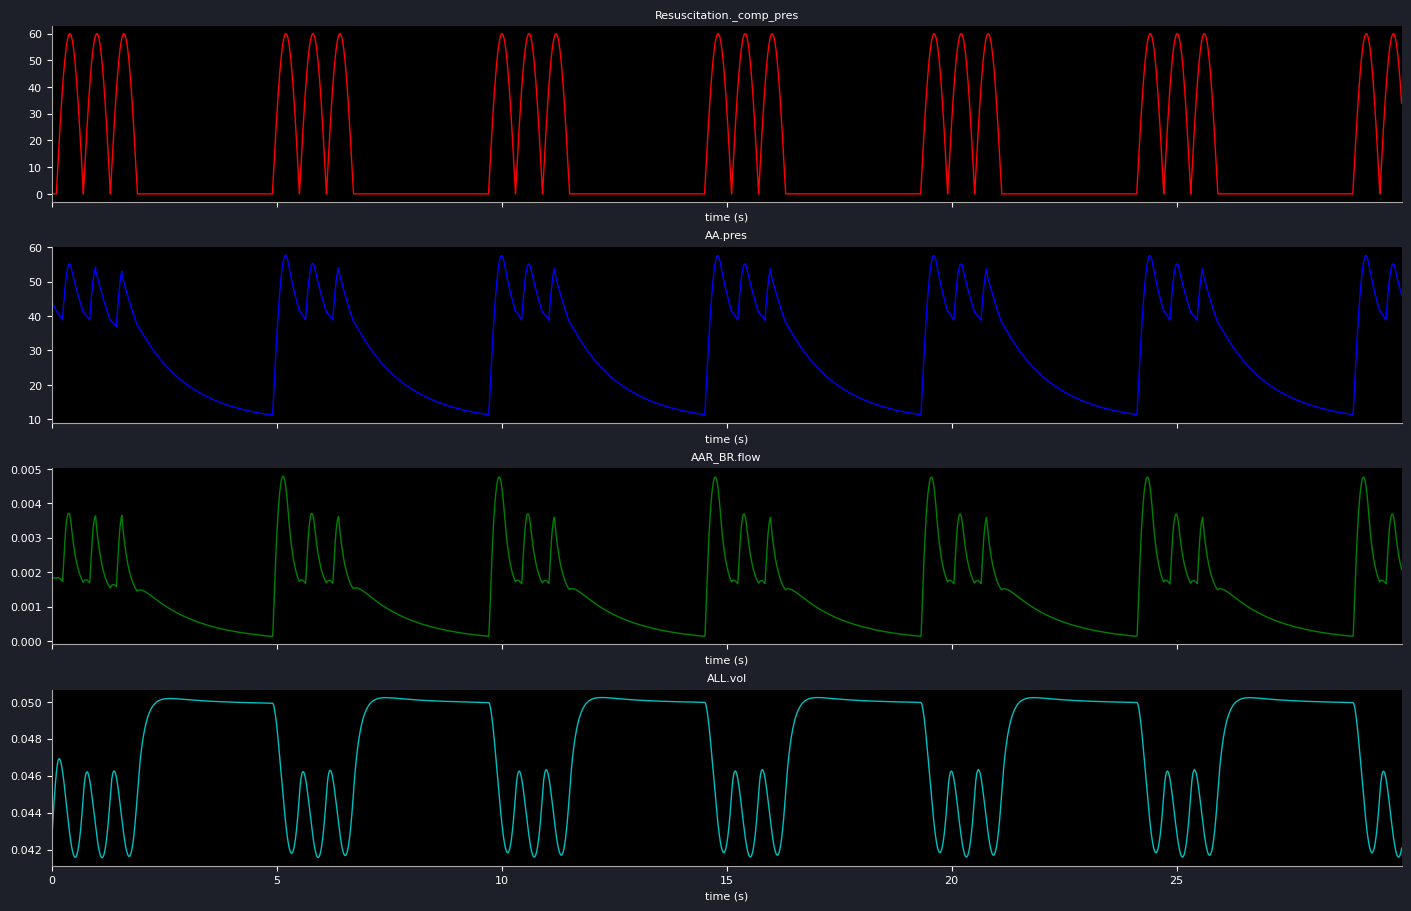

Resuscitation._comp_pres: max       60.0 min        0.0
AA.pres         : max   57.71194, min   11.21151 mmHg
AAR_BR.flow     : net   84.21795, forward   84.21795, backward        0.0 ml/min, stroke volume:     0.6903 ml, 
ALL.vol         : max   50.23307, min   41.56504 ml


In [13]:
models["Resuscitation"].start_cpr()
models["Resuscitation"].vent_pres = 4.0
models["Resuscitation"].compressions = 3.0
models["Resuscitation"].ventilations = 1.0
models["Resuscitation"].vent_freq = 30.0
models["Resuscitation"].comp_freq = 10.0
models["Resuscitation"].vent_pres = 0.0
models["Resuscitation"].chest_comp_pres = 60.0
models["Resuscitation"].async_ventilation = False
neo.plot_time_graph(
    ["Resuscitation._comp_pres", "AA.pres", "AAR_BR.flow", "ALL.vol"],
    combined=False,
    sharey=False,
    sampleinterval=0.0005,
    fill=False,
    time_to_calculate=30,
)

In [17]:
neo.get_bloodgas("COR")

{'ph': 6.964709404969559,
 'po2': 0.004638203130245208,
 'pco2': 16.360924310799042,
 'hco3': 27.567721149751247,
 'be': -7.256984518523306,
 'so2': 0.00610318853789997}

In [15]:
neo.fast_forward(120)

 Ready in 7.0 sec. Average model step in 0.0292 ms.


In [ ]:
neo.get_vitals()

In [ ]:
models["Resuscitation"].chest_comp_targets

In [ ]:
neo.get_total_blood_volume()